Análisis de datos SAMU: Llamadas 131
===================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, time, timedelta
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
#locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

#importo sólo algunas de mis funciones, dejo otras excluídas....

cargo algunos scripts que me suelen servir para análisis

In [2]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())

['/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc']

# Recojo la BD

In [3]:
BD = pd.read_pickle('./llamadas_contraspaso.pkl')
BD.head()

,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin,Trapaso
0,2017-02-22 20:54:07,Desde SAMU,SIP,Trunk,204.0,9.904491e+08,NaN,Contestada,12,8,2017-02-22 20:54:19,No
1,2017-02-22 20:54:30,Desde SAMU,SIP,Trunk,204.0,9.992239e+09,NaN,Contestada,20,16,2017-02-22 20:54:50,No
2,2017-02-22 21:21:17,Hacia SAMU,Trunk,SIP,NaN,1.310000e+02,200.0,Contestada,24,14,2017-02-22 21:21:41,No
3,2017-02-22 21:23:01,Hacia SAMU,Trunk,SIP,NaN,1.310000e+02,203.0,Contestada,30,20,2017-02-22 21:23:31,No
4,2017-02-22 21:24:47,Hacia SAMU,Trunk,SIP,NaN,1.310000e+02,200.0,Contestada,63,53,2017-02-22 21:25:50,No


In [4]:
BD.info()
# print('Descrip inicial')
# for entrada in BD.columns:
#     print(entrada)
#     BD[entrada].head()
#     tab_frec(BD[entrada]).head()
#     BD[entrada].describe()
#     print('------------------------------')    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127721 entries, 0 to 1127720
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Fecha         1127721 non-null  datetime64[ns]
 1   Tipo_llamada  1014913 non-null  category      
 2   Origen_tipo   1127240 non-null  category      
 3   Destino_tipo  1033158 non-null  category      
 4   Origen_n      1075784 non-null  float64       
 5   Destino_n     1067257 non-null  float64       
 6   Destino_nSIP  793090 non-null   float64       
 7   Estado        1127721 non-null  category      
 8   Duracion      1127721 non-null  int64         
 9   Cobro         1127721 non-null  int64         
 10  Fin           1127721 non-null  datetime64[ns]
 11  Trapaso       1127721 non-null  object        
dtypes: category(4), datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 73.1+ MB


# Rápido análisis de un mes para saber a que nos enfretamos

In [5]:
db1 = BD.loc[BD.Fecha > pd.to_datetime('2020-05-01')]
db1.Fecha.describe()
db1.head()

count                   18270
unique                  18140
top       2020-05-15 20:43:01
freq                        3
first     2020-05-01 00:00:19
last      2020-05-23 23:12:29
Name: Fecha, dtype: object

,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin,Trapaso
1109451,2020-05-01 00:00:19,Hacia SAMU,Trunk,SIP,949799508.0,131.0,204.0,Contestada,567,566,2020-05-01 00:09:46,No
1109452,2020-05-01 00:03:26,Entre SAMU,SIP,SIP,206.0,212.0,212.0,Contestada,112,101,2020-05-01 00:05:18,Si
1109453,2020-05-01 00:04:41,Hacia SAMU,Trunk,SIP,950740068.0,131.0,200.0,Contestada,444,443,2020-05-01 00:12:05,No
1109454,2020-05-01 00:08:59,Entre SAMU,SIP,SIP,204.0,205.0,205.0,Contestada,152,119,2020-05-01 00:11:31,Si
1109455,2020-05-01 00:11:47,Entre SAMU,SIP,SIP,200.0,205.0,205.0,Contestada,140,138,2020-05-01 00:14:07,Si


Descripicón de el periodo de estudio

In [6]:
# Periodo de estudio
dum_t1 = db1.Fecha.describe()['first']
dum_t2 = db1.Fecha.describe()['last']

# Cantidad de días del estudio
dum_dt = db1.Fecha.describe()['last'] - db1.Fecha.describe()['first']

# Cantidad de llamadas en el estudio
dum_n = db1.Fecha.describe()['count']

In [7]:
print('La cantidad de llamadas en el periodo de estudio fue de {} llamadas, equivalente a {} llamadas diarias y {} mensuales.'
	.format(
		dum_n,
		round(dum_n/pd.to_numeric(dum_dt.days)),
		round(30*dum_n/pd.to_numeric(dum_dt.days))
    )
     )

La cantidad de llamadas en el periodo de estudio fue de 18270 llamadas, equivalente a 830.0 llamadas diarias y 24914.0 mensuales.


22

count    18270.000000
mean       112.029885
std        368.178792
min          0.000000
25%         18.000000
50%         52.000000
75%        150.000000
max      23370.000000
Name: Duracion, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7146eb5710>]],
      dtype=object)

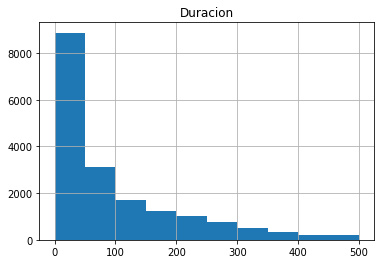

In [8]:
dum_dt.days
db1.Duracion.describe()
db1.hist(column='Duracion', range= (0,500))

In [9]:
db1.loc[db1.Destino_n == 131].Estado.value_counts()

Contestada       9386
No Válida         211
Perdida           166
Sin respuesta       0
Ocupado             0
FAILED              0
Name: Estado, dtype: int64

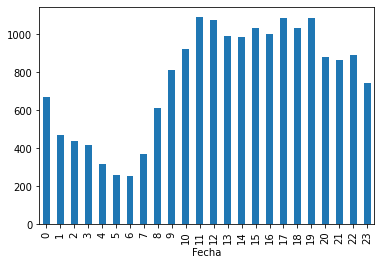

In [10]:
db1.groupby(db1.Fecha.dt.hour).Fecha.count().plot(kind='bar')

In [260]:
def descripcion_llamadas_general(inicio, fin, ax= None, **kwargs):
    # inicio y fin son fechas 
    db1 = BD.loc[
        (BD.Fecha > pd.to_datetime(inicio)) &
        (BD.Fecha < pd.to_datetime(fin))]
    # Periodo de estudio ########################################################
    dum_t1 = db1.Fecha.describe()['first']
    dum_t2 = db1.Fecha.describe()['last']

    # Cantidad de días del estudio ########################################################
    dum_dt = db1.Fecha.describe()['last'] - db1.Fecha.describe()['first']

    # Cantidad de llamadas en el estudio ########################################################
    dum_n = db1.Fecha.describe()['count']
    print('El periodo de estudio fue desde el {} al {}. '
        .format(dum_t1.strftime('%d-%b-%Y'), dum_t2.strftime('%d-%b-%Y'))
        )
    print('El tiempo de estudio corresponde a {} días, lo mismo que {} meses. '
        .format(
            dum_dt.days,
            str(round(dum_dt.days/30,3))
            )
        )
    print('')
    print('La cantidad de llamadas en el periodo de estudio fue de {} llamadas, equivalente a {} llamadas diarias y {} mensuales.'
        .format(
            dum_n,
            round(dum_n/pd.to_numeric(dum_dt.days)),
            round(30*dum_n/pd.to_numeric(dum_dt.days))
        )
         )

In [341]:
def DLG_cantidad(inicio, fin, ax= None, **kwargs):
    # inicio y fin son fechas 
    db1 = BD.loc[
        (BD.Fecha > pd.to_datetime(inicio)) &
        (BD.Fecha < pd.to_datetime(fin))]
    # Periodo de estudio ########################################################
    dum_t1 = db1.Fecha.describe()['first']
    dum_t2 = db1.Fecha.describe()['last']

    # Cantidad de días del estudio ########################################################
    dum_dt = db1.Fecha.describe()['last'] - db1.Fecha.describe()['first']
    # Gráfico de llamadas por hora ########################################################
    ax = ax or plt.gca()  # si hay ax se queda, si no lo hay lo creo
    (db1.groupby(db1.Fecha.dt.hour).count().Fecha/dum_dt.days).plot(
        ax = ax,
        label=' {} al {}. '.format(dum_t1.strftime('%d-%b-%Y'), dum_t2.strftime('%d-%b-%Y')),
        **kwargs)
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de llamadas')
    plt.title('Cantidad de llamadas según hora')
    plt.ylim([0,90])
    plt.grid()
    plt.legend()
    
def DLG_duracion(inicio, fin, ax= None, **kwargs):
    # inicio y fin son fechas 
    db1 = BD.loc[
        (BD.Fecha > pd.to_datetime(inicio)) &
        (BD.Fecha < pd.to_datetime(fin))]
    # Periodo de estudio ########################################################
    dum_t1 = db1.Fecha.describe()['first']
    dum_t2 = db1.Fecha.describe()['last']

    # Cantidad de días del estudio ########################################################
    dum_dt = db1.Fecha.describe()['last'] - db1.Fecha.describe()['first']
    # Gráfico de llamadas por hora ########################################################
    ax = ax or plt.gca()  # si hay ax se queda, si no lo hay lo creo
    ((db1.groupby(db1.Fecha.dt.hour)).Duracion.sum()/(dum_dt.days*60)).plot(
        ax = ax,
        label=' {} al {}. '.format(dum_t1.strftime('%d-%b-%Y'), dum_t2.strftime('%d-%b-%Y')),
        **kwargs)
    plt.xlabel('Hora del día')
    plt.ylabel('Duración acumulada de llamadas en minutos')
    plt.title('Duración de llamadas por hora')
    plt.ylim([0,140])
    plt.grid()
    plt.legend()

In [332]:
def bucle_DLG_cantidad(fecha, repeticiones=4):
    Start1 = pd.to_datetime(fecha)
    n=0
    for x in range(repeticiones):
        inicio  = Start1 + timedelta(weeks=n)
        fin     = inicio + timedelta(weeks=1)
        DLG_cantidad(inicio, fin)
        n=n+1
    
def bucle_DLG_duracion(fecha, repeticiones=4):
    Start1 = pd.to_datetime(fecha)
    n=0
    for x in range(repeticiones):
        inicio  = Start1 + timedelta(weeks=n)
        fin     = inicio + timedelta(weeks=1)
        DLG_duracion(inicio, fin)
        n=n+1

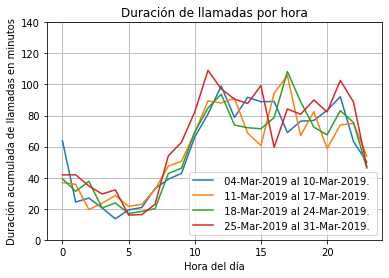

In [342]:
bucle_DLG_duracion('2019-03-04')

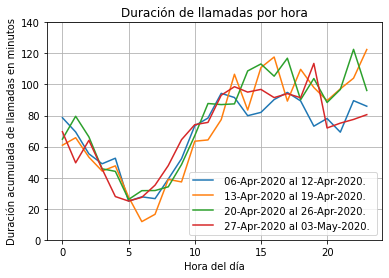

In [343]:
bucle_DLG_duracion('2020-04-06')